In [30]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import pdb
import random
import maze as mz
import matplotlib.pyplot as plt
    
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

In [31]:
# (b) Illustrate an optimal policy for T=20

In [35]:
# Create an environment maze
env = mz.Maze(maze)
horizon = 20

In [38]:
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0,6,5);

KeyboardInterrupt: 

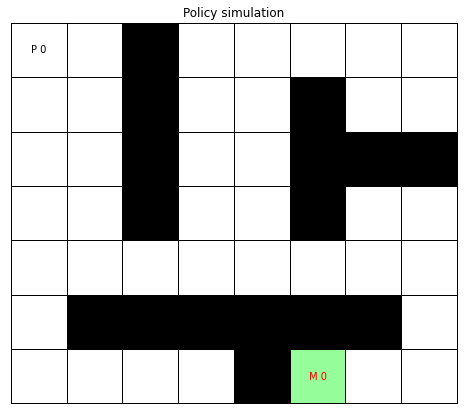

In [37]:
path = env.simulate(start, policy, method);
mz.animate_solution(maze, path)

In [ ]:
# (b) Illustrate an optimal policy for T=20 v2.

In [39]:
t = 0
T = 20
minotaur_pos = (0,3)

for i in range(env.maze.shape[0]):
    for j in range(env.maze.shape[1]):
        if env.maze[i,j] != 1:
            state = env.map[(i,j,minotaur_pos[0], minotaur_pos[1])]
            print(i ," ",j," ",  V[state, t])
        
    print()

0   0   -14.102012671821637
0   1   -13.233959758081541
0   3   -12.122056201183174
0   4   -10.135294405106624
0   5   -12.122056201183174
0   6   -12.122056201183174
0   7   -13.844017933574275

1   0   -13.233959758081541
1   1   -12.122056201183174
1   3   -10.135294405106624
1   4   -9.14315349778763
1   6   -13.844017933574275
1   7   -14.102012671821637

2   0   -12.122056201183174
2   1   -11.186442126374974
2   3   -9.14315349778763
2   4   -8.142479473747315

3   0   -11.186442126374974
3   1   -10.135294405106624
3   3   -8.142479473747315
3   4   -7.145011302451019
3   6   -5.145011302451019
3   7   -4.145011302451019

4   0   -10.135294405106624
4   1   -9.14315349778763
4   2   -8.142479473747315
4   3   -7.145011302451019
4   4   -6.145011302451019
4   5   -5.145011302451019
4   6   -4.145011302451019
4   7   -3.145011302451019

5   0   -11.186442126374974
5   7   -2.1450113024510196

6   0   -12.122056201183174
6   1   -13.233959758081541
6   2   -14.102012671821637
6  

In [ ]:
# (b) When the minotaur cannot stand still

In [6]:
# Create an environment maze
env = mz.Maze(maze)
max_horizon = 40

In [7]:
probabilities_escape = np.zeros(max_horizon)

In [8]:
# Finite horizon
for horizon in range(13,max_horizon):

    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon);
    # Simulate the shortest path starting from position A
    method = 'DynProg';
    start  = (0,0,5,6);
    path = env.simulate(start, policy, method);
    
    no_runs = 100
    paths =[]

    win_count = 0
    dead_count = 0

    for i in range(no_runs):
        path = env.simulate(start, policy, method);
        player_path = [ el[:2] for el in path ]
        minotaur_path = [ el[2:] for el in path ]

        if 1 in [1 for i, j in zip(player_path, minotaur_path) if i == j]:
            dead_count += 1
        paths.append(path)
        if path[-1][:2]==(6, 5):
            win_count +=1

        #print("win_count ",win_count)
        #print("dead_count ",dead_count)

    probabilities_escape[horizon] = win_count/no_runs


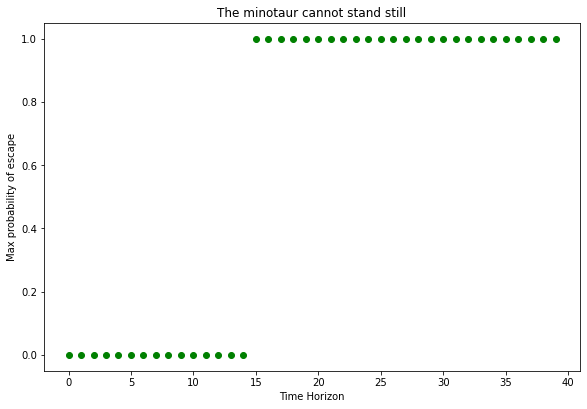

In [9]:
#print(probabilities_escape)
plt.figure(figsize=(9.6,6.4))
plt.plot(range(0,max_horizon),probabilities_escape, 'go')
plt.ylabel('Max probability of escape')
plt.title('The minotaur cannot stand still')
plt.xlabel('Time Horizon')
#plt.show()
plt.savefig('Q1b_max_prob_escape_cannot_stand_still.png')

In [11]:
# (b) When the minotaur can stand still

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
# Create an environment maze
env = mz.Maze(maze, True)
max_horizon = 40

In [11]:
probabilities_escape_stay = np.zeros(max_horizon)

In [12]:
# Finite horizon
for horizon in range(13,max_horizon):

    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon);
    # Simulate the shortest path starting from position A
    method = 'DynProg';
    start  = (0,0,5,6);
    path = env.simulate(start, policy, method);
    
    no_runs = 10000
    paths =[]

    win_count = 0
    dead_count = 0

    for i in range(no_runs):
        path = env.simulate(start, policy, method);
        player_path = [ el[:2] for el in path ]
        minotaur_path = [ el[2:] for el in path ]

        if 1 in [1 for i, j in zip(player_path, minotaur_path) if i == j]:
            dead_count += 1
        paths.append(path)
        if path[-1][:2]==(6, 5):
            win_count +=1

        #print("win_count ",win_count)
        #print("dead_count ",dead_count)

    probabilities_escape_stay[horizon] = win_count/no_runs

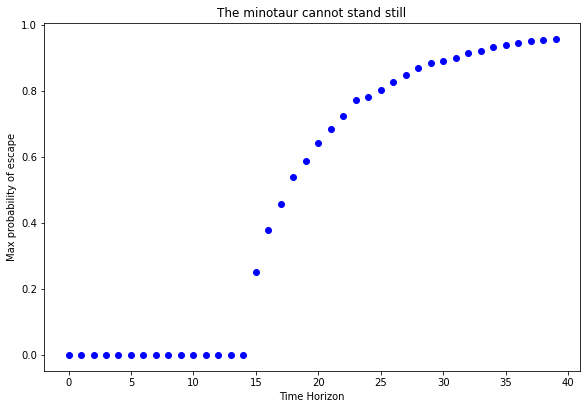

In [13]:
plt.figure(figsize=(9.6,6.4))
plt.plot(range(0,max_horizon),probabilities_escape_stay, 'bo')
plt.title("The minotaur cannot stand still")
plt.ylabel('Max probability of escape')
plt.xlabel('Time Horizon')
plt.savefig('Q1b_max_prob_escape_can_stand_still.png')

In [ ]:
# (c) When the player's life is geometrically distributed.

In [14]:
# Create an environment maze
env = mz.Maze(maze)
gamma = 29/30
eps = 0.001

In [15]:
# Solve the MDP problem with value iteration
V, policy= mz.value_iteration(env,gamma,eps);

# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0,6,5);
path = env.simulate(start, policy, method);

In [16]:
# Caluclate probability of escaping with value iteration
no_runs = 10000
paths =[]

win_count = 0

for i in range(no_runs):
    path = env.simulate(start, policy, method);
    player_path = [ el[:2] for el in path ]
    minotaur_path = [ el[2:] for el in path ]

    if path[-1][:2]==(6, 5):
        win_count +=1

print("Probability of escape ", win_count/no_runs, " in ", no_runs, " runs.")

Probability of escape  0.7594  in  10000  runs.
